<a href="https://colab.research.google.com/github/jbreddy18/Tuberculosis-Using-CNN/blob/main/T_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import cv2
import os
import numpy as np
# import pandas as pd
# from math import exp, sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import keras
import tensorflow as tf
import tensorflow.keras.backend as K
from keras import Input
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten
# from keras.layers import  BatchNormalization, Concatenate, Add, DepthwiseConv2D, GlobalAveragePooling2D, SeparableConv2D,GlobalMaxPooling2D
from tensorflow.keras.optimizers import SGD,RMSprop,Adam,Adagrad
from keras.layers import Conv2D , MaxPooling2D
from tensorflow.keras import layers
from keras.layers import *
from tensorflow.keras import activations
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nr="/content/drive/MyDrive/T.B DATASET/Normal"
tb="/content/drive/MyDrive/T.B DATASET/Tuberculosis"

In [ ]:
img_data_list=[]

labels = []

i = 0
for dataset in os.listdir(nr):

        # print ('Loaded the images of dataset-'+'{}\n'.format(data_path+'/'+dataset))
        input_img=cv2.imread(nr+ '/'+ dataset)
        input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
        input_img_resize=cv2.resize(input_img,(128,128), interpolation = cv2.INTER_AREA)
        img_data_list.append(input_img_resize)
#fo('Loaded the images of dataset-'+'{}\n'.format(trans_path + '/trans'+ dataset[3:]))
        #label=cv2.imread(nr + '/'+ dataset)
       # label = cv2.cvtColor(label, cv2.COLOR_BGR2RGB)
       # label_resize=cv2.resize(label,(256,256), interpolation = cv2.INTER_AREA)
        labels.append('0')
        i = i+1


#label=np.array(labels)
#print(label.shape)

img_data = np.array(img_data_list,dtype='float32')/255
print(img_data.shape)

# pl = plt.imshow(img_data[1])
# plt.show()

(3520, 128, 128, 3)


In [ ]:
#img_data_list=[]

#labels = []

i = 0
for dataset in os.listdir(tb):

        # print ('Loaded the images of dataset-'+'{}\n'.format(data_path+'/'+dataset))
        input_img=cv2.imread(tb + '/'+ dataset )
        input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
        input_img_resize=cv2.resize(input_img,(128,128), interpolation = cv2.INTER_AREA)
        img_data_list.append(input_img_resize)
        # if (i%1000==0):
        #   print(i)
        # print ('Loaded the images of dataset-'+'{}\n'.format(trans_path + '/trans'+ dataset[3:]))
        #label=cv2.imread(tb + '/'+ dataset)
        #label = cv2.cvtColor(label, cv2.COLOR_BGR2RGB)
        #label_resize=cv2.resize(label,(256,256), interpolation = cv2.INTER_AREA)
        labels.append('1')
        i = i+1
        # if (i%1000==0):
        #   print(i)

#label=np.array(labels)
#print(labels.shape)


img_data = np.array(img_data_list,dtype='float32')/255
print(img_data.shape)

(4230, 128, 128, 3)


In [ ]:
a=tf.keras.utils.to_categorical(
    labels, num_classes=2, dtype='float32')
print(a)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:

# Example directory containing image data
#image_directory = '/content/drive/MyDrive/T.B DATASET/Normal'

# Load images and labels
#X, y = load_images("/content/drive/MyDrive/T.B DATASET/Normal")

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(img_data, a, test_size=0.2, random_state=42)

# At this point, X_train, X_test, y_train, and y_test are ready to be used in your model

Test Data

In [ ]:
#test_path= '/content/drive/MyDrive/T.B DATASET/Normal' #'/drive/MyDrive/attention_model/dataset/test_hazy' '
# gt_path='/drive/MyDrive/attention_model/dataset/test_clear'

In [ ]:
print(X_train.shape)

(3952, 256, 256, 3)


In [ ]:
y_test.shape

(40, 2)

Define a Convolution Neural Network

In [ ]:

def createmodel():

    model = Sequential()
    input_shape = (128, 128, 3)

    #The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=2, activation='softmax'))

    return model


model=createmodel()

In [ ]:
model.compile()

True


In [ ]:
#from tensorflow.keras import Model
#model = createModel()
ssim_loss = tf.keras.losses.MeanSquaredError()



ssim_loss = tf.keras.losses.MeanSquaredError()  # Correct assignment

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss=ssim_loss,
              metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test,y_test),
                    verbose=1,  shuffle=True)

Epoch 1/100
212/212 [==============================] - 22s 62ms/step - loss: 0.0992 - accuracy: 0.8676 - val_loss: 0.0693 - val_accuracy: 0.9054
Epoch 2/100
212/212 [==============================] - 6s 29ms/step - loss: 0.0604 - accuracy: 0.9217 - val_loss: 0.0505 - val_accuracy: 0.9421
Epoch 3/100
212/212 [==============================] - 7s 31ms/step - loss: 0.0525 - accuracy: 0.9294 - val_loss: 0.4862 - val_accuracy: 0.1714
Epoch 4/100
212/212 [==============================] - 6s 31ms/step - loss: 0.0447 - accuracy: 0.9412 - val_loss: 0.0410 - val_accuracy: 0.9433
Epoch 5/100
212/212 [==============================] - 6s 30ms/step - loss: 0.0442 - accuracy: 0.9397 - val_loss: 0.0490 - val_accuracy: 0.9504
Epoch 6/100
212/212 [==============================] - 7s 31ms/step - loss: 0.0414 - accuracy: 0.9436 - val_loss: 0.0446 - val_accuracy: 0.9433
Epoch 7/100
212/212 [==============================] - 6s 29ms/step - loss: 0.0402 - accuracy: 0.9465 - val_loss: 0.0425 - val_accuracy

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                        

In [ ]:
y_pred=model.predict(X_test)

27/27 [==============================] - 1s 9ms/step


In [ ]:
print(np.argmax(y_pred,axis = 1))



[0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 

In [ ]:
print(np.argmax(y_test,axis = 1))

[0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 

(<Figure size 500x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

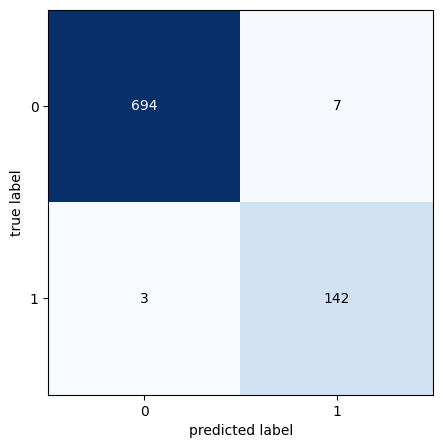

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix
cm= confusion_matrix(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1))
plot_confusion_matrix(cm, figsize=(5,5))

In [ ]:
# model.save('/content/drive/MyDrive/attention_model/1-unet_50_ssim-loss.h5')

Visualize Loss and Accuracy

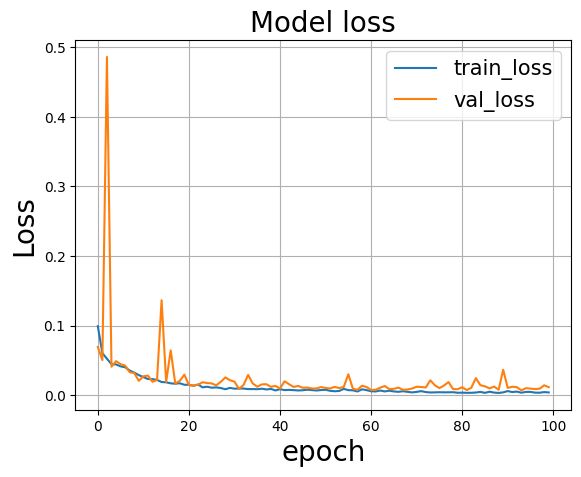

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.legend(['train_loss', 'val_loss'], loc='upper right', fontsize=15)
plt.grid()
plt.show()

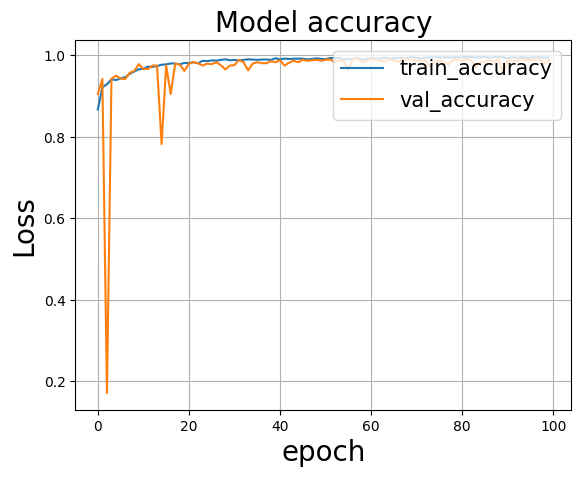

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.legend(['train_accuracy', 'val_accuracy'], loc='upper right', fontsize=15)
plt.grid()
# plt.savefig('/content/drive/MyDrive/1811011/PROGRESS_2/FILES/FGED-RO/FEDRO_With_R1__Loss.pdf')
plt.show()

Test Model